## Boston Housing Price Prediction

In [2]:
import mlflow

mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")
print("Successfully set MLFlow Server Path")

Successfully set MLFlow Server Path


In [1]:
## Reload module

%load_ext autoreload 
%autoreload 2

We will be using the boston housing price dataset. There are 14 attributes in each case of the dataset. They are:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000 dollars
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

Have a look here for reference of this dataset: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [2]:
from src.models.boston_house_price_prediction import env
from src.models.boston_house_price_prediction import train_model
from src.models.boston_house_price_prediction import feature_engineering


boston = train_model.load_data(data_dir=env.data_dir)
if boston is not None:
    print("******* Successfully loaded boston data ********")
else:
    print("Boston data is not loaded.")
    raise Exception()

# Split the boston dataset into features and target
X, y = feature_engineering.split_features_target(boston)

***************** LOAD ENVIRONMENT ********************+
Project Root DIR /home/joesan/Projects/Private/ml-projects/nn-playground
Project Data DIR /home/joesan/Projects/Private/ml-projects/nn-playground/data/raw/boston_housing_price
Models Dump DIR /home/joesan/Projects/Private/ml-projects/nn-playground/models/boston_housing_price
***************** LOAD ENVIRONMENT ********************+
Dataset file: /home/joesan/Projects/Private/ml-projects/nn-playground/data/raw/boston_housing_price/boston_housing.csv
Dataset file exists.
******* Successfully loaded boston data ********


In [124]:
# Let us describe the data
#print(boston.describe())
print(X.shape, y.shape)
print(X.head(1))

(506, 13) (506,)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE   DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.09    1  296.0     15.3   

       B  LSTAT  
0  396.9   4.98  


# Step 0: Let us do some data visualization

We first do some data visualization to decide on how we should do data cleansing and feature engineering.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from pandas.plotting import scatter_matrix


# scatter plot
plt.scatter(boston['CRIM'], boston['MEDV'])
plt.xlabel("CRIM")
plt.ylabel("MEDV")


# Step 1: Basic Data Cleansing

A very important rule to consider when doing data pre-processing is that:

**Fit on training data, transform on both training and testing data.**

In [3]:
# Delete unique columns & delete duplicate rows
from src.models.boston_house_price_prediction import cleanse_data

boston_delete_unique_columns = cleanse_data.delete_unique_columns(boston)
X, y = cleanse_data.delete_duplicate_rows(boston_delete_unique_columns)
print(X.shape, y.shape)

************+ delete_unique_columns ************+ 
Shape of boston before deleting columns with unique values: (506, 14)
Are there any columns with unique values? False
************+ delete_unique_columns ************+ 
************+ delete_duplicate_rows ************+ 
Shape of boston before deleting duplicated rows: (506, 14)
Are there any duplicate rows? False
************+ delete_duplicate_rows ************+ 
(506, 13) (506,)


In [133]:
# Select columns with object or categorical dtype
categorical_columns = X.select_dtypes(include=['object', 'category'])

# Print the selected columns
print("Categorical columns:")
print(categorical_columns)

# Assuming your DataFrame is named 'dataframe'
# Replace 0 with NaN
X.replace(0, pd.NA, inplace=True)

# Calculate the percentage of null values for each column
percentage_null = (X.isnull().sum() / len(X)) * 100
print("Percentage of null values for each column:")
print(percentage_null)

Index: 3, Column: CHAS, Unique Values: 2, Percentage: 0.4%
Categorical columns:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[506 rows x 0 columns]
Percentage of null values for each column:
CRIM        0.000000
ZN         73.517787
INDUS       0.000000
CHAS       93.083004
NOX         0.000000
RM          0.000000
AGE         0.000000
DIS         0.000000
RAD         0.000000
TAX         0.000000
PTRATIO     0.000000
B           0.000000
LSTAT       0.000000
dtype: float64


In [107]:
# Handling missing data

# Summarize the number of rows with missing values for each column
for column in boston.columns:
    # Count number of rows with missing values
    n_miss = boston[column].isnull().sum()
    perc = n_miss / boston.shape[0] * 100
    print(f' > {column}, Missing: {n_miss} ({perc:.1f}%)')

 > CRIM, Missing: 0 (0.0%)
 > ZN, Missing: 0 (0.0%)
 > INDUS, Missing: 0 (0.0%)
 > CHAS, Missing: 0 (0.0%)
 > NOX, Missing: 0 (0.0%)
 > RM, Missing: 0 (0.0%)
 > AGE, Missing: 0 (0.0%)
 > DIS, Missing: 0 (0.0%)
 > RAD, Missing: 0 (0.0%)
 > TAX, Missing: 0 (0.0%)
 > PTRATIO, Missing: 0 (0.0%)
 > B, Missing: 0 (0.0%)
 > LSTAT, Missing: 0 (0.0%)
 > MEDV, Missing: 0 (0.0%)


# Step 2: Outlier Detection

CRIM: Not Gaussian  ShapiroResult(statistic=0.4499647802113227, pvalue=1.3285893795939685e-36)
CRIM: Not Gaussian  KstestResult(statistic=0.5025212984276741, pvalue=9.101764614072096e-119, statistic_location=0.00632, statistic_sign=-1)
ZN: Not Gaussian  ShapiroResult(statistic=0.5559466932042578, pvalue=7.882830475544967e-34)
ZN: Not Gaussian  KstestResult(statistic=0.5, pvalue=1.6871111181943794e-117, statistic_location=0.0, statistic_sign=-1)
INDUS: Not Gaussian  ShapiroResult(statistic=0.8997938834997923, pvalue=1.0646987056818077e-17)
INDUS: Not Gaussian  KstestResult(statistic=0.9382587138709638, pvalue=0.0, statistic_location=2.01, statistic_sign=-1)
CHAS: Not Gaussian  ShapiroResult(statistic=0.27476065687000795, pvalue=2.3505073051297636e-40)
CHAS: Not Gaussian  KstestResult(statistic=0.5, pvalue=1.6871111181943794e-117, statistic_location=0, statistic_sign=-1)
NOX: Not Gaussian  ShapiroResult(statistic=0.9356359807798653, pvalue=5.776225084930437e-14)
NOX: Not Gaussian  Kstest

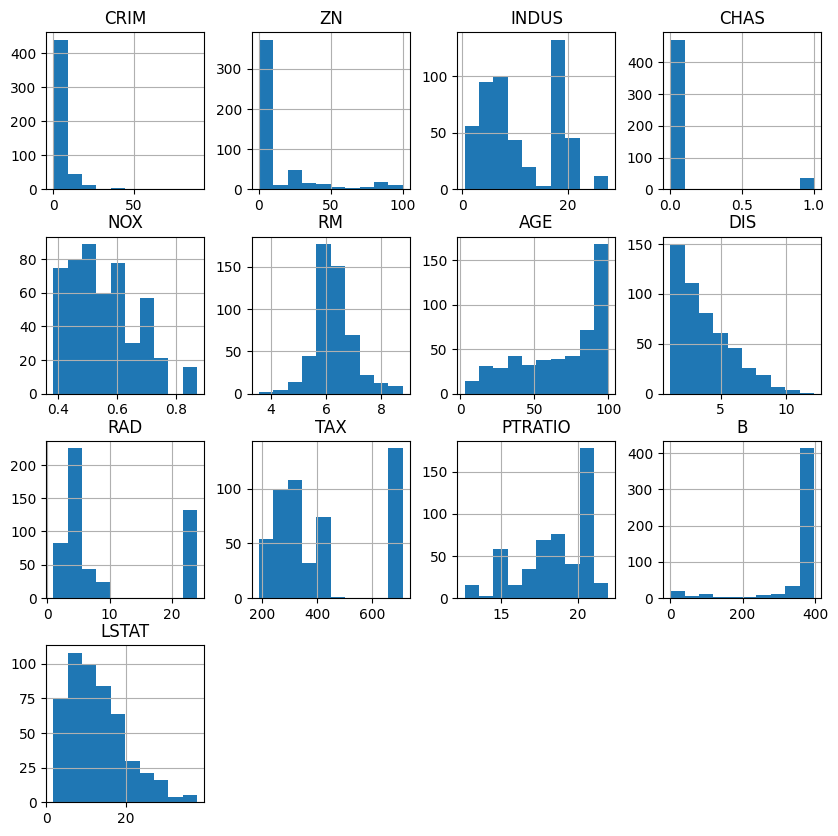

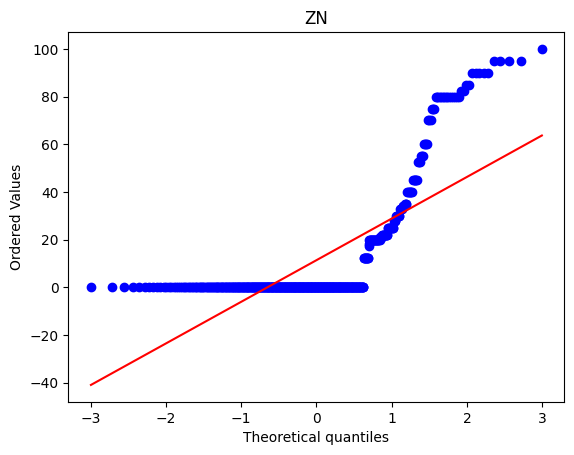

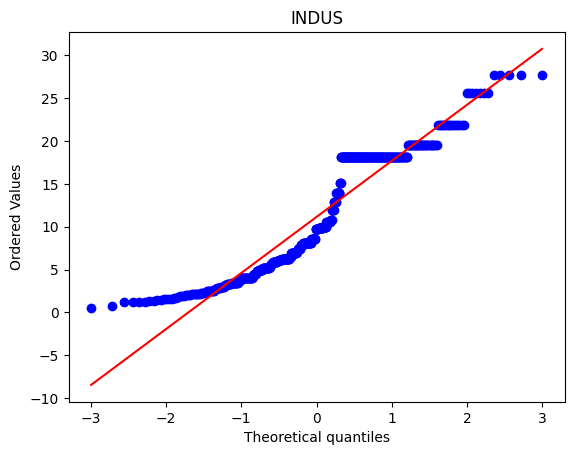

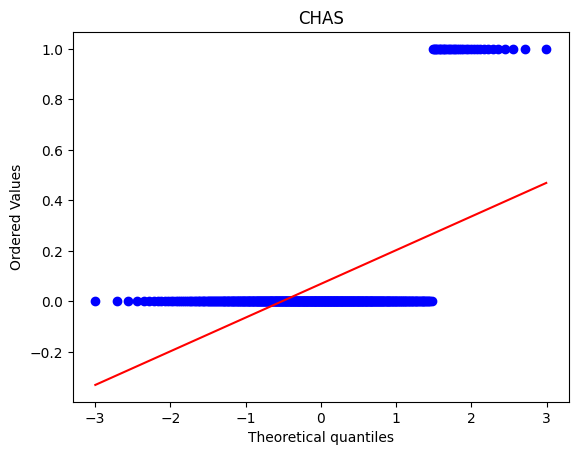

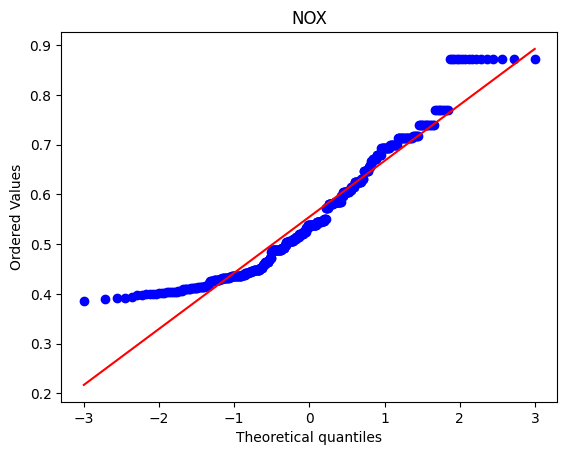

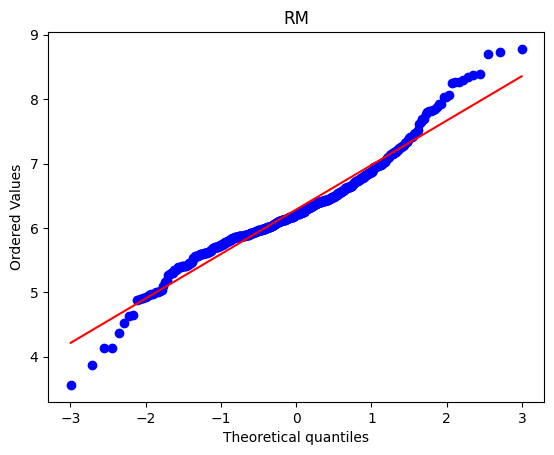

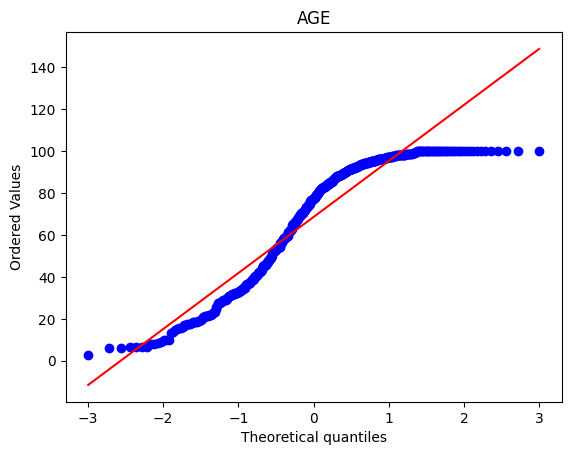

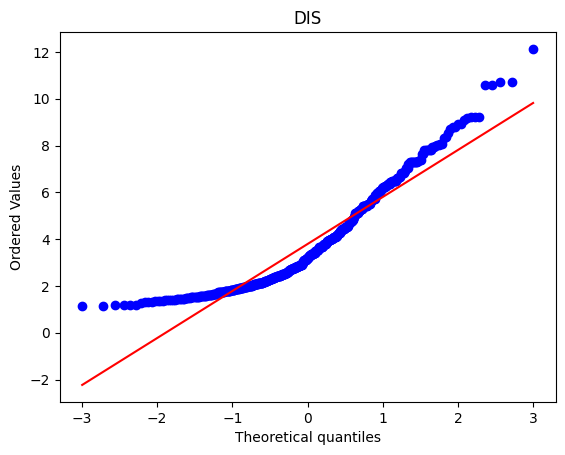

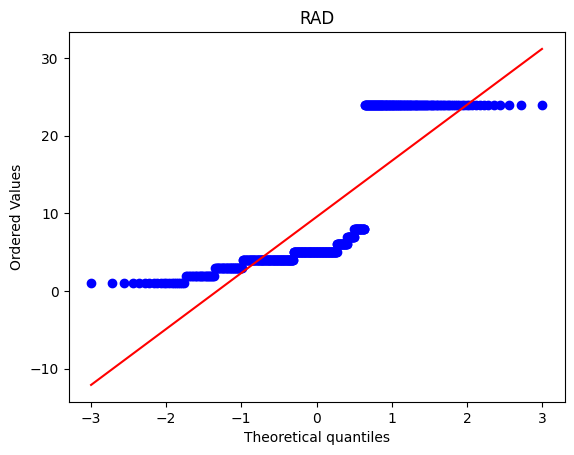

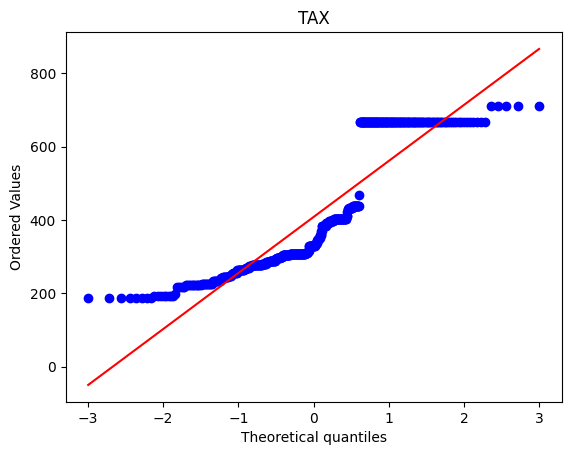

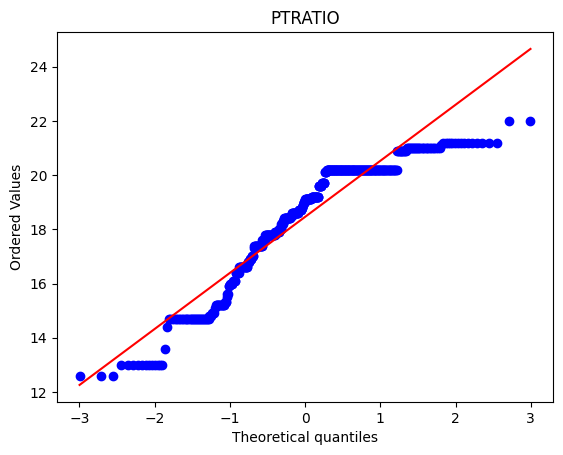

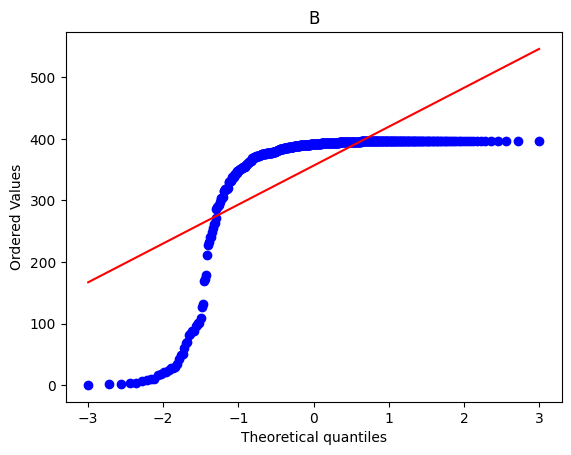

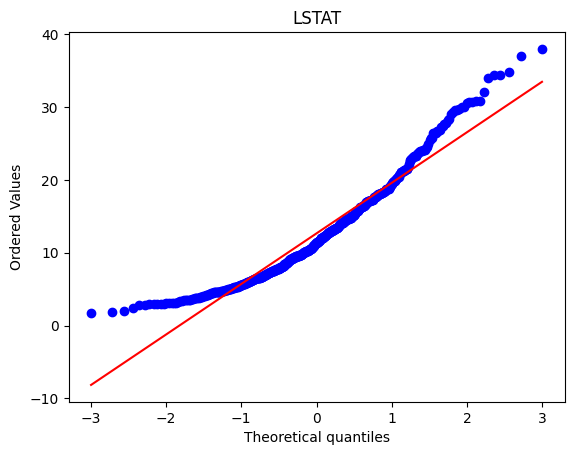

lower = -34.15, upper = 58.89


UFuncTypeError: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.StrDType'>) -> None

In [6]:
X.hist(figsize=(10,10))

from scipy.stats import shapiro, kstest
from numpy import percentile

for i in X.columns:
    print(f'{i}: {"Not Gaussian" if shapiro(X[i])[1]<0.05 else "Gaussian"}  {shapiro(X[i])}')
    print(f'{i}: {"Not Gaussian" if kstest(X[i].values,"norm")[1]<0.05 else "Gaussian"}  {kstest(X[i].values,"norm")}')
    
from scipy.stats import probplot
import matplotlib.pyplot as plt
for i in X.columns:
    probplot(x=X[i],dist='norm',plot=plt)
    plt.title(i)
    plt.show()

<Figure size 640x480 with 0 Axes>

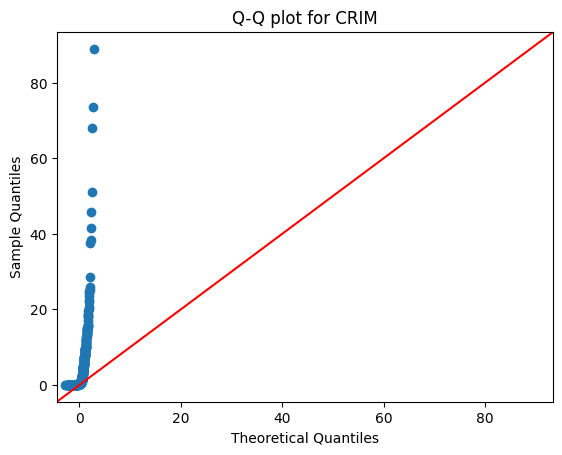

<Figure size 640x480 with 0 Axes>

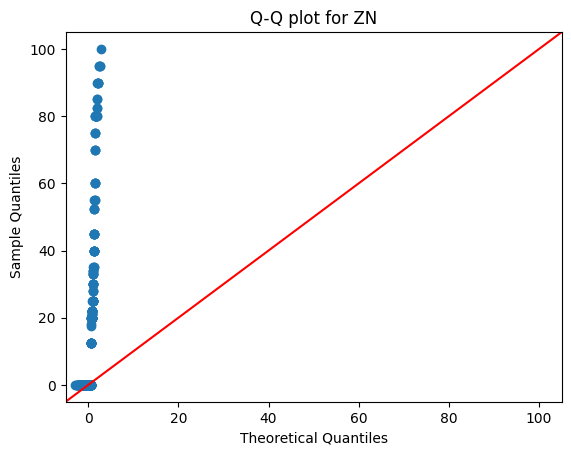

<Figure size 640x480 with 0 Axes>

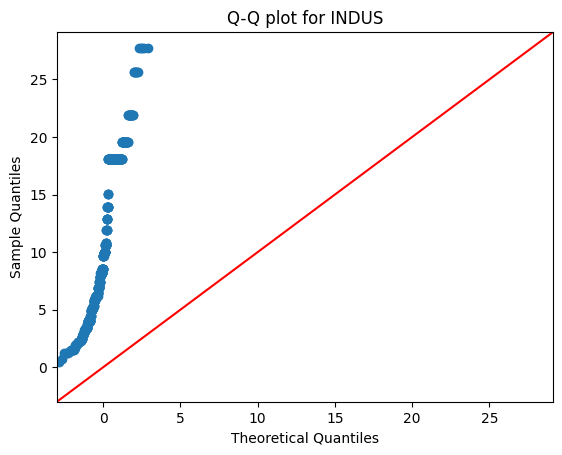

<Figure size 640x480 with 0 Axes>

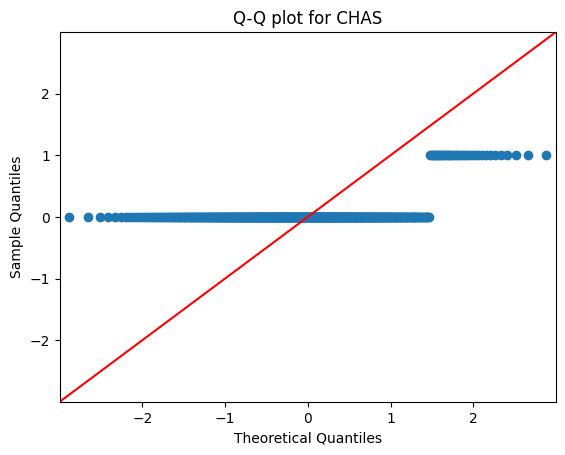

<Figure size 640x480 with 0 Axes>

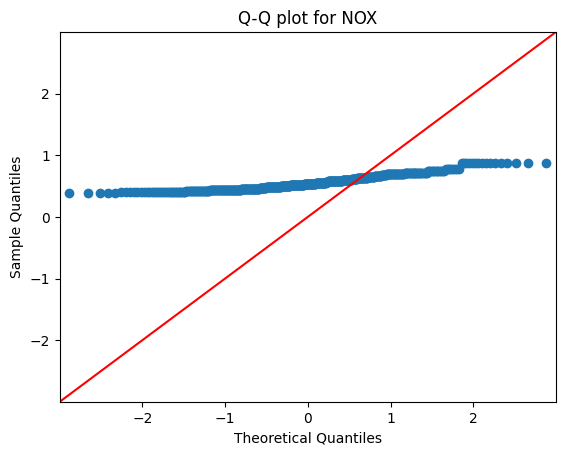

<Figure size 640x480 with 0 Axes>

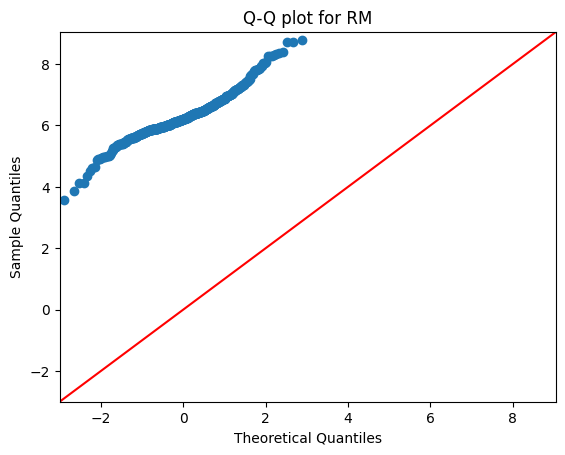

<Figure size 640x480 with 0 Axes>

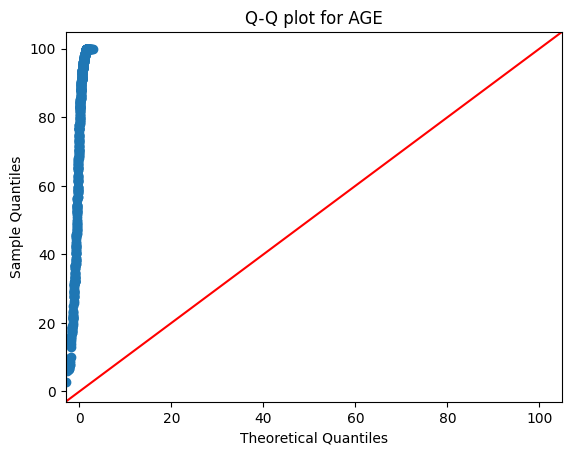

<Figure size 640x480 with 0 Axes>

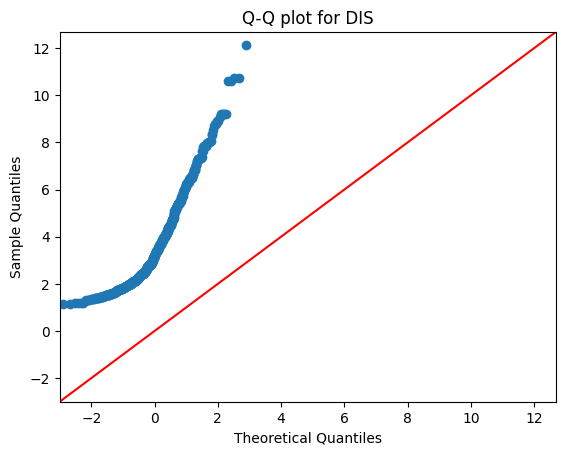

<Figure size 640x480 with 0 Axes>

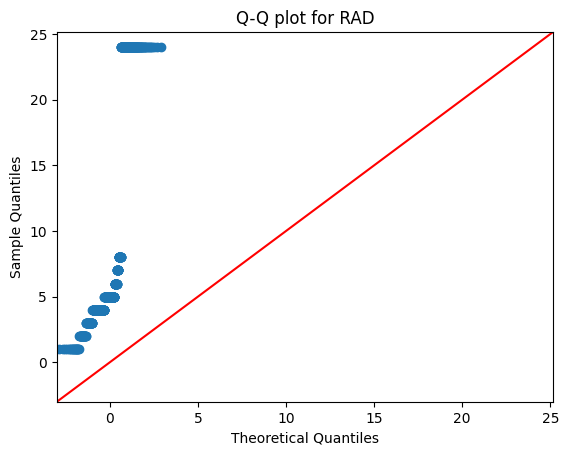

<Figure size 640x480 with 0 Axes>

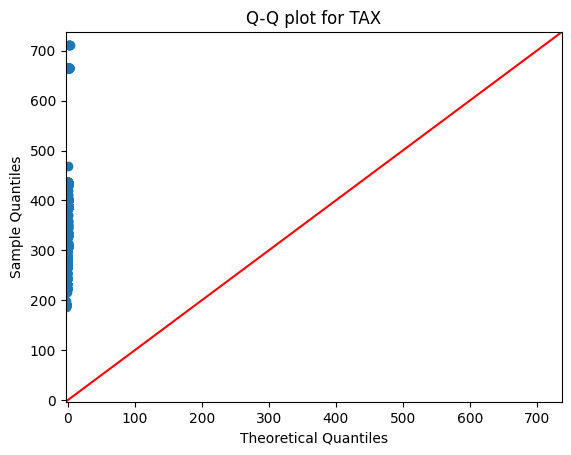

<Figure size 640x480 with 0 Axes>

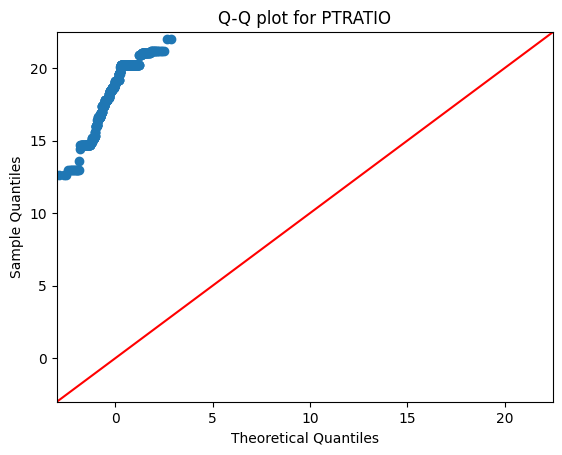

<Figure size 640x480 with 0 Axes>

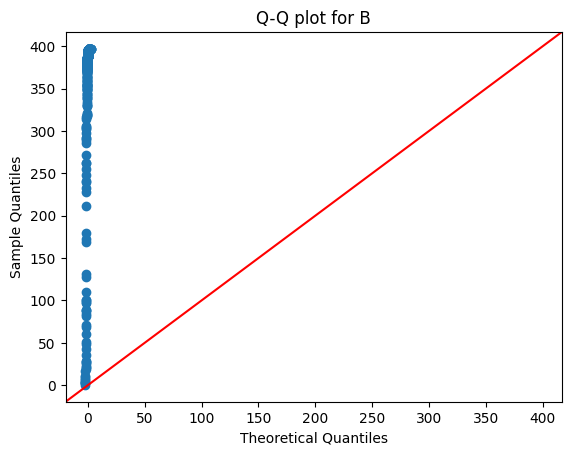

<Figure size 640x480 with 0 Axes>

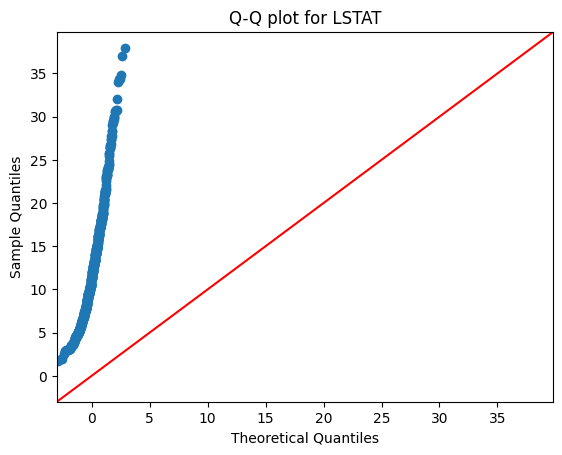

In [8]:
import statsmodels.api as sm

def qq_plots(dataframe):
    for column in dataframe.columns:
        plt.figure()
        sm.qqplot(dataframe[column], line ='45')
        plt.title(f'Q-Q plot for {column}')
        plt.show()
        
qq_plots(X)

In [12]:
from src.models.boston_house_price_prediction import feature_engineering

# The null hypothesis (H0) is that the data comes from a normal distribution
X.dtypes
feature_engineering.test_for_normality(X)

Shapiro-Wilk Normality Test Results:
Column 'CRIM': H0 is rejected because p-value is less than 0.05 Statistics=0.450, p-value=0.000
Column 'ZN': H0 is rejected because p-value is less than 0.05 Statistics=0.556, p-value=0.000
Column 'INDUS': H0 is rejected because p-value is less than 0.05 Statistics=0.900, p-value=0.000
Column 'CHAS': H0 is rejected because p-value is less than 0.05 Statistics=0.275, p-value=0.000
Column 'NOX': H0 is rejected because p-value is less than 0.05 Statistics=0.936, p-value=0.000
Column 'RM': H0 is rejected because p-value is less than 0.05 Statistics=0.961, p-value=0.000
Column 'AGE': H0 is rejected because p-value is less than 0.05 Statistics=0.892, p-value=0.000
Column 'DIS': H0 is rejected because p-value is less than 0.05 Statistics=0.903, p-value=0.000
Column 'RAD': H0 is rejected because p-value is less than 0.05 Statistics=0.680, p-value=0.000
Column 'TAX': H0 is rejected because p-value is less than 0.05 Statistics=0.815, p-value=0.000
Column 'PTR

In [113]:
# Identify missing values
from src.models.boston_house_price_prediction import cleanse_data

missing_values = boston.isnull().sum()
print(f"missing_values = {missing_values}")
deleted_rows = cleanse_data.delete_missing_values(boston)

missing_values = CRIM       0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
************+ delete_missing_values ************+ 
Shape of boston before deleting rows with missing values: (506, 12)
	Column CRIM: Zeros = 0, NaNs = 0
	Column INDUS: Zeros = 0, NaNs = 0
	Column NOX: Zeros = 0, NaNs = 0
	Column RM: Zeros = 0, NaNs = 0
	Column AGE: Zeros = 0, NaNs = 0
	Column DIS: Zeros = 0, NaNs = 0
	Column RAD: Zeros = 0, NaNs = 0
	Column TAX: Zeros = 0, NaNs = 0
	Column PTRATIO: Zeros = 0, NaNs = 0
	Column B: Zeros = 0, NaNs = 0
	Column LSTAT: Zeros = 0, NaNs = 0
	Column MEDV: Zeros = 0, NaNs = 0
Shape of boston after deleting rows with missing values: (506, 12)
************+ delete_missing_values ************+ 


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

# Step 2: Feature Selection

We calculate the Person's co-relation co-efficient! The correlation coefficient, often denoted as r, measures the strength and direction of the linear relationship between two variables. It ranges from -1 to 1.

- **Positive Correlation (0 < r ≤ 1):** As one variable increases, the other variable tends to also increase.
  - **Perfect Positive Correlation (r = 1):** The variables increase in perfect proportion.
  - **Strong Positive Correlation (0.7 ≤ r < 1):** There is a strong relationship; as one variable increases, the other increases significantly.
  - **Moderate Positive Correlation (0.5 ≤ r < 0.7):** There is a moderate relationship; as one variable increases, the other tends to increase.
  - **Weak Positive Correlation (0 < r < 0.5):** There is a weak relationship; as one variable increases, the other increases slightly.

- **Negative Correlation (-1 ≤ r < 0):** As one variable increases, the other variable tends to decrease.
  - **Perfect Negative Correlation (r = -1):** The variables decrease in perfect proportion.
  - **Strong Negative Correlation (-1 < r ≤ -0.7):** There is a strong inverse relationship; as one variable increases, the other decreases significantly.
  - **Moderate Negative Correlation (-0.7 < r ≤ -0.5):** There is a moderate inverse relationship; as one variable increases, the other tends to decrease.
  - **Weak Negative Correlation (-0.5 < r < 0):** There is a weak inverse relationship; as one variable increases, the other decreases slightly.

- **No Correlation (r = 0):** There is no linear relationship between the variables.

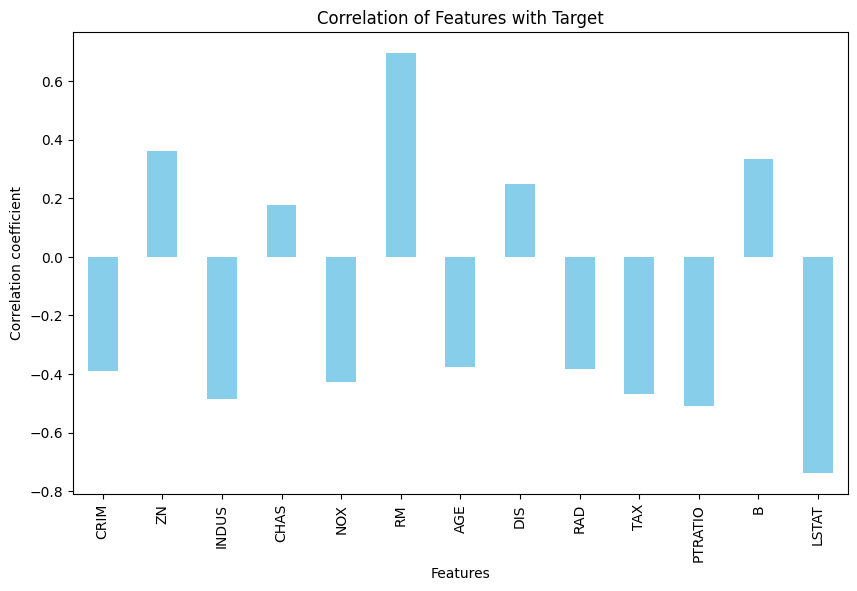

************+ delete_features_with_low_correlation ************+ 
Shape of boston before deleting features with low co-relation (506, 14)
Features with low correlation (|r| < 0.1): []
Shape of boston after deleting features with low co-relation: (506, 14)
************+ delete_features_with_low_correlation ************+ 


In [83]:
from src.models.boston_house_price_prediction.feature_selection import *
# Select features

# Compute the correlation matrix
correlation_matrix = boston.corr()
correlations_with_target = correlation_matrix['MEDV'].drop('MEDV')  # drop the correlation of the target with itself

# Plot the correlations
plt.figure(figsize=(10, 6))
correlations_with_target.plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Target')
plt.xlabel('Features')
plt.ylabel('Correlation coefficient')
plt.show()

df_reduced = delete_features_with_low_correlation(boston, 'MEDV')

In [112]:
from src.models.boston_house_price_prediction.feature_engineering import *
import numpy as np

# Split into input and output elements dynamically
X = boston.iloc[:, :-1]  # Select all columns except the last one as features
y = boston.iloc[:, -1]   # Select only the last column as the target
evaluate_imputation_strategies(X, y)

>mean 4.864 (0.962)
>median 4.864 (0.962)
>most_frequent 4.864 (0.962)
>('constant', 0) 4.864 (0.962)
Best imputation strategy: ('constant', 0)


({'mean': {'mean': 4.8638791570895865, 'std': 0.9615397189787922},
  'median': {'mean': 4.8638791570895865, 'std': 0.9615397189787922},
  'most_frequent': {'mean': 4.8638791570895865, 'std': 0.9615397189787922},
  ('constant', 0): {'mean': 4.8638791570895865, 'std': 0.9615397189787922}},
 {'mean': array([4.45470125, 5.12075564, 3.0645204 , 7.03091096, 3.85918549,
         4.29328574, 4.38512252, 6.34766815, 5.81148709, 3.93833161,
         4.14905347, 6.68699724, 5.73651492, 4.85730002, 4.72502166,
         4.02133245, 5.17373702, 5.57498257, 4.71307545, 3.55589834,
         4.53610147, 3.7906331 , 4.41488597, 5.10210746, 5.94161465,
         5.95604057, 5.6927278 , 5.12007758, 4.04063004, 3.82167412]),
  'median': array([4.45470125, 5.12075564, 3.0645204 , 7.03091096, 3.85918549,
         4.29328574, 4.38512252, 6.34766815, 5.81148709, 3.93833161,
         4.14905347, 6.68699724, 5.73651492, 4.85730002, 4.72502166,
         4.02133245, 5.17373702, 5.57498257, 4.71307545, 3.55589834,
 